In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('D:/Edwisor/bank-loan.csv')

In [3]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
df.dtypes

age           int64
ed            int64
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default     float64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E7F209AEF0>,
      dtype=object)

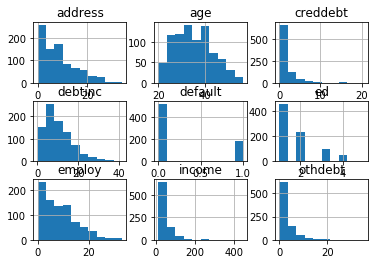

In [5]:
df.hist()

In [6]:
df.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [7]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns])

     default
700      NaN
701      NaN
702      NaN
703      NaN
704      NaN
..       ...
845      NaN
846      NaN
847      NaN
848      NaN
849      NaN

[150 rows x 1 columns]


In [8]:
df.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [9]:
X = df.drop(['default'],axis=1)

In [10]:
y = df['default']

In [11]:
from fancyimpute import KNN

Using TensorFlow backend.
C:\Users\uib43221\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\uib43221\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\uib43221\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

In [12]:
y = pd.DataFrame(y)

In [13]:
y = KNN(k=5).fit_transform(y) 

Imputing row 1/850 with 0 missing, elapsed time: 0.046
Imputing row 101/850 with 0 missing, elapsed time: 0.047
Imputing row 201/850 with 0 missing, elapsed time: 0.047
Imputing row 301/850 with 0 missing, elapsed time: 0.047
Imputing row 401/850 with 0 missing, elapsed time: 0.048
Imputing row 501/850 with 0 missing, elapsed time: 0.048
Imputing row 601/850 with 0 missing, elapsed time: 0.049
Imputing row 701/850 with 1 missing, elapsed time: 0.049
Imputing row 801/850 with 1 missing, elapsed time: 0.050
[KNN] Warning: 150/850 still missing after imputation, replacing with 0


In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [15]:
scaled_data = scalar.fit_transform(X)

In [16]:
scaled_data = pd.DataFrame(scaled_data)

In [17]:
scaled_data = scaled_data.rename(columns={0:'age',1:'ed',2:'employ',3:'address',4:'income',5:'debtinc',6:'creddebt',7:'othdebt'})

In [18]:
X = scaled_data

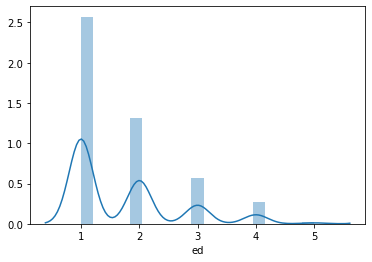

In [31]:
sns.distplot(df['ed'])

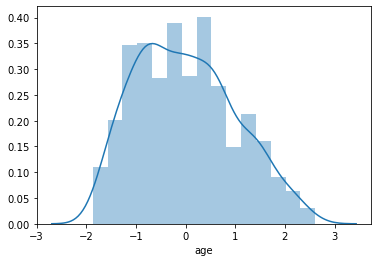

In [20]:
sns.distplot(X['age'])

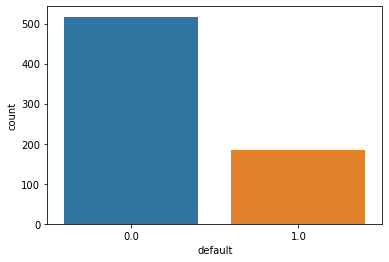

In [32]:
sns.countplot(x = 'default',data=df)

In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
sm = SMOTE(random_state=42)

In [37]:
X_res, y_res = sm.fit_resample(X, y)


C:\Users\uib43221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
y_sns_count = y_res

In [43]:
 from collections import Counter

In [44]:

print('Resampled dataset shape %s', y.shape)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape %s (850, 1)
Resampled dataset shape Counter({1.0: 667, 0.0: 667})


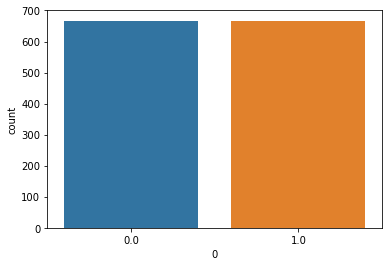

In [45]:
y_sns_count = pd.DataFrame(y_sns_count)
y_sns_count
sns.countplot(x = 0,data=y_sns_count)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [313]:
clf = LogisticRegression()

In [460]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.3, random_state = 1)

In [461]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [462]:
y_pred = clf.predict(X_test)

In [463]:
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.rename(columns={0:'default'})

In [464]:
print("ACC -->",accuracy_score(y_test,y_pred))

ACC --> 0.7780548628428927


In [465]:
confusion_matrix(y_pred,y_test)

array([[152,  28],
       [ 61, 160]], dtype=int64)

In [466]:
print("Logistic",classification_report(y_test,y_pred))

Logistic               precision    recall  f1-score   support

         0.0       0.84      0.71      0.77       213
         1.0       0.72      0.85      0.78       188

    accuracy                           0.78       401
   macro avg       0.78      0.78      0.78       401
weighted avg       0.79      0.78      0.78       401



In [467]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob = y_pred_prob.reshape(1,-1)

In [468]:
from sklearn.preprocessing import binarize

In [469]:
y_pred_class = binarize(y_pred_prob,0.49)[0]
y_pred_class = y_pred_class.astype(int)

In [470]:
y_pred_class = pd.DataFrame(y_pred_class)
y_pred_class = y_pred_class.rename(columns={0:'default'})
#y_pred_class = y_pred_class.replace(0,'no')
#y_pred_class = y_pred_class.replace(1,'yes')

In [471]:
confusion = confusion_matrix(y_pred_class,y_test)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("\n" ,TP,TN,FP,FN)
mr = ((FP+FN)/(TP+TN+FP+FN))
print("\n mr--",mr)
tpr = TP/(TP+FN)
print("\n tpr--" ,tpr)
fpr = FP/(TN+FP)
print("\n fpr--" ,fpr)
tnr = TN/(TN+FP)
print("\n tnr--" ,tnr)
pre = TP/(FP+TP)
print("\n pre--" ,pre)
preva = (FN+TP)/401
print("\n prev--" ,preva)

[[150  26]
 [ 63 162]]

 162 150 26 63

 mr-- 0.22194513715710723

 tpr-- 0.72

 fpr-- 0.14772727272727273

 tnr-- 0.8522727272727273

 pre-- 0.8617021276595744

 prev-- 0.5610972568578554


In [451]:
print("Logistic",classification_report(y_test,y_pred_class, target_names=None))

Logistic               precision    recall  f1-score   support

         0.0       0.85      0.70      0.77       213
         1.0       0.72      0.86      0.78       188

    accuracy                           0.78       401
   macro avg       0.79      0.78      0.78       401
weighted avg       0.79      0.78      0.78       401



(<matplotlib.axes._subplots.AxesSubplot at 0x1e7fd3619b0>, 1    245
 0    156
 Name: default, dtype: int64)

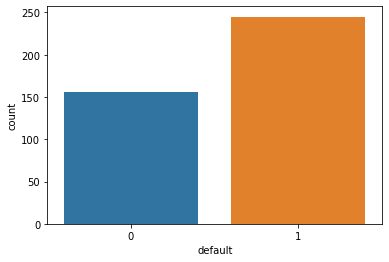

In [63]:
sns.countplot(x='default',data=y_pred_class),y_pred_class['default'].value_counts()

In [80]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,threshold = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

In [81]:
logit_roc_auc1 = roc_auc_score(y_test,y_pred_class)

In [82]:
import matplotlib.pyplot as plt

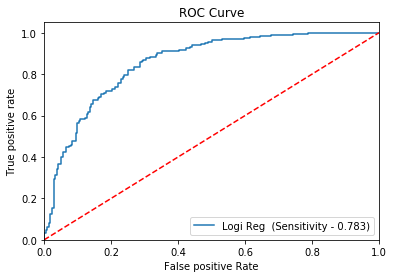

In [83]:
plt.figure()
plt.plot(fpr,tpr,label = 'Logi Reg  (Sensitivity - %0.3f)'%logit_roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

In [84]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve

In [85]:
precision, recall, thresholds = precision_recall_curve(y_test,y_pred_class)

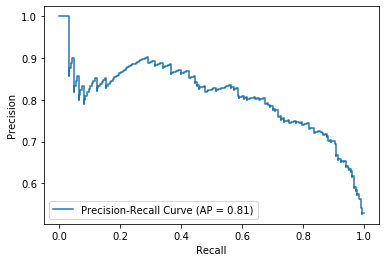

In [89]:

plot_precision_recall_curve(clf,X_test,y_test,name='Precision-Recall Curve')

In [537]:
from sklearn.neighbors import KNeighborsClassifier
clf_K = KNeighborsClassifier(n_neighbors=3)

In [538]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.3, random_state = 1)

In [539]:
clf_K.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [540]:
y_pred = clf_K.predict(X_test)

In [541]:
y_pred = pd.DataFrame(y_pred)
y_pred = y_pred.rename(columns={0:'default'})

In [542]:
print("ACC -->",accuracy_score(y_pred,y_test))

ACC --> 0.8104738154613467


In [543]:
print("KNN",classification_report(y_test,y_pred, target_names=None))

KNN               precision    recall  f1-score   support

         0.0       0.90      0.73      0.80       213
         1.0       0.75      0.90      0.82       188

    accuracy                           0.81       401
   macro avg       0.82      0.82      0.81       401
weighted avg       0.83      0.81      0.81       401



In [544]:
y_pred_prob = clf.predict_proba(X_test)[:,1]
y_pred_prob = y_pred_prob.reshape(1,-1)

In [545]:
y_pred_class = binarize(y_pred_prob,0.50)[0]
y_pred_class = y_pred_class.astype(int)

In [546]:
print("KNN",classification_report(y_test,y_pred_class, target_names=None))

KNN               precision    recall  f1-score   support

         0.0       0.84      0.71      0.77       213
         1.0       0.72      0.85      0.78       188

    accuracy                           0.78       401
   macro avg       0.78      0.78      0.78       401
weighted avg       0.79      0.78      0.78       401



In [547]:
confusion = confusion_matrix(y_pred_class,y_test)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("\n" ,TP,TN,FP,FN)
mr = ((FP+FN)/(TP+TN+FP+FN))
print("\n mr--",mr)
tpr = TP/(TP+FN)
print("\n tpr--" ,tpr)
fpr = FP/(TN+FP)
print("\n fpr--" ,fpr)
tnr = TN/(TN+FP)
print("\n tnr--" ,tnr)
pre = TP/(FP+TP)
print("\n pre--" ,pre)
preva = (FN+TP)/401
print("\n prev--" ,preva)

[[152  28]
 [ 61 160]]

 160 152 28 61

 mr-- 0.22194513715710723

 tpr-- 0.7239819004524887

 fpr-- 0.15555555555555556

 tnr-- 0.8444444444444444

 pre-- 0.851063829787234

 prev-- 0.5511221945137157


In [548]:
from sklearn.metrics import roc_auc_score,roc_curve
fpr,tpr,threshold = roc_curve(y_test, clf_K.predict_proba(X_test)[:,1])

In [552]:
logit_roc_auc1 = roc_auc_score(y_test,y_pred)

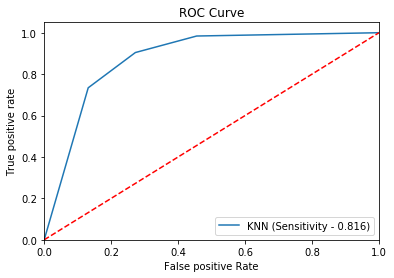

In [553]:
plt.figure()
plt.plot(fpr,tpr,label = 'KNN (Sensitivity - %0.3f)'%logit_roc_auc1)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

In [554]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_class)

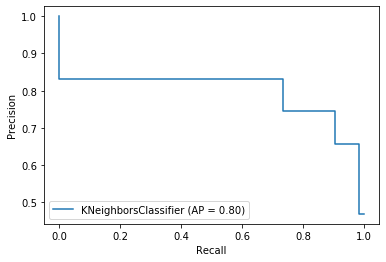

In [555]:
plot_precision_recall_curve(clf_K,X_test,y_test)

In [386]:
from sklearn import tree
clf_D = tree.DecisionTreeClassifier()

In [494]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.3, random_state = 1)

In [495]:
clf_D.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [496]:
y_pred = clf_D.predict(X_test)
y_pred = pd.DataFrame(y_pred)

In [497]:
print("ACC -->",accuracy_score(y_pred,y_test))

ACC --> 0.800498753117207


In [498]:
print("DT",classification_report(y_test,y_pred, target_names=None))

DT               precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       213
         1.0       0.79      0.78      0.79       188

    accuracy                           0.80       401
   macro avg       0.80      0.80      0.80       401
weighted avg       0.80      0.80      0.80       401



In [499]:
y_pred_prob = clf_D.predict_proba(X_test)[:,1]
y_pred_prob = y_pred_prob.reshape(1,-1)

In [500]:
y_pred_class = binarize(y_pred_prob,0.45)[0]
y_pred_class = y_pred_class.astype(int)

In [501]:
print("DT",classification_report(y_test,y_pred_class, target_names=None))

DT               precision    recall  f1-score   support

         0.0       0.81      0.82      0.81       213
         1.0       0.79      0.78      0.79       188

    accuracy                           0.80       401
   macro avg       0.80      0.80      0.80       401
weighted avg       0.80      0.80      0.80       401



In [502]:
confusion = confusion_matrix(y_pred_class,y_test)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("\n" ,TP,TN,FP,FN)
mr = ((FP+FN)/(TP+TN+FP+FN))
print("\n mr--",mr)
tpr = TP/(TP+FN)
print("\n tpr--" ,tpr)
fpr = FP/(TN+FP)
print("\n fpr--" ,fpr)
tnr = TN/(TN+FP)
print("\n tnr--" ,tnr)
pre = TP/(FP+TP)
print("\n pre--" ,pre)
preva = (FN+TP)/401
print("\n prev--" ,preva)

[[174  41]
 [ 39 147]]

 147 174 41 39

 mr-- 0.19950124688279303

 tpr-- 0.7903225806451613

 fpr-- 0.19069767441860466

 tnr-- 0.8093023255813954

 pre-- 0.7819148936170213

 prev-- 0.46384039900249374


In [198]:
fpr,tpr,threshold = roc_curve(y_test, clf_D.predict_proba(X_test)[:,1])

In [199]:
DecissionTree = roc_auc_score(y_test,y_pred)

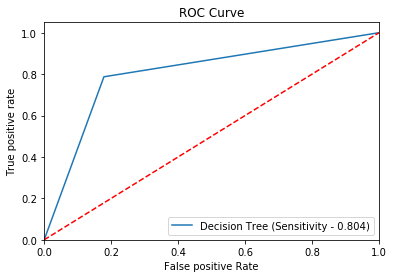

In [200]:
plt.figure()
plt.plot(fpr,tpr,label = 'Decision Tree (Sensitivity - %0.3f)'%DecissionTree)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

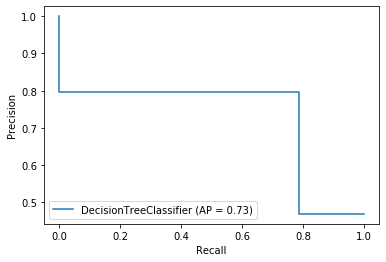

In [195]:
precision, recall, thresholds = precision_recall_curve(y_test, clf_D.predict_proba(X_test)[:,1])
plot_precision_recall_curve(clf_D,X_test,y_test)

In [503]:
from sklearn.ensemble import RandomForestClassifier
clf_R = RandomForestClassifier()

In [504]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.3, random_state = 1)

In [505]:
clf_R.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [506]:
y_pred = clf_R.predict(X_test)
y_pred = pd.DataFrame(y_pred)
print("Acc score is :",accuracy_score(y_pred,y_test)*100)

Acc score is : 86.78304239401497


In [507]:
print("RF",classification_report(y_test,y_pred, target_names=None))

RF               precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       213
         1.0       0.84      0.89      0.86       188

    accuracy                           0.87       401
   macro avg       0.87      0.87      0.87       401
weighted avg       0.87      0.87      0.87       401



In [508]:
y_pred_prob = clf_R.predict_proba(X_test)[:,1]
y_pred_prob = y_pred_prob.reshape(1,-1)

In [509]:
y_pred_class = binarize(y_pred_prob,0.50)[0]
y_pred_class = y_pred_class.astype(int)

In [510]:
print("RF",classification_report(y_test,y_pred_class, target_names=None))

RF               precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       213
         1.0       0.84      0.89      0.86       188

    accuracy                           0.87       401
   macro avg       0.87      0.87      0.87       401
weighted avg       0.87      0.87      0.87       401



In [511]:
confusion = confusion_matrix(y_pred_class,y_test)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("\n" ,TP,TN,FP,FN)
mr = ((FP+FN)/(TP+TN+FP+FN))
print("\n mr--",mr)
tpr = TP/(TP+FN)
print("\n tpr--" ,tpr)
fpr = FP/(TN+FP)
print("\n fpr--" ,fpr)
tnr = TN/(TN+FP)
print("\n tnr--" ,tnr)
pre = TP/(FP+TP)
print("\n pre--" ,pre)
preva = (FN+TP)/401
print("\n prev--" ,preva)

[[181  21]
 [ 32 167]]

 167 181 21 32

 mr-- 0.13216957605985039

 tpr-- 0.8391959798994975

 fpr-- 0.10396039603960396

 tnr-- 0.8960396039603961

 pre-- 0.8882978723404256

 prev-- 0.49625935162094764


In [234]:
fpr,tpr,threshold = roc_curve(y_test, clf_R.predict_proba(X_test)[:,1])

In [235]:
RandomForest = roc_auc_score(y_test,y_pred)

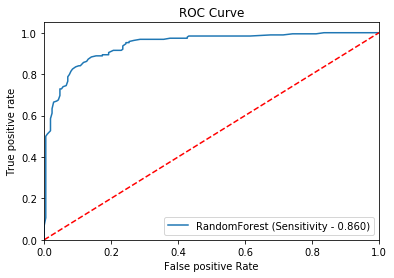

In [236]:
plt.figure()
plt.plot(fpr,tpr,label = 'RandomForest (Sensitivity - %0.3f)'%RandomForest)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

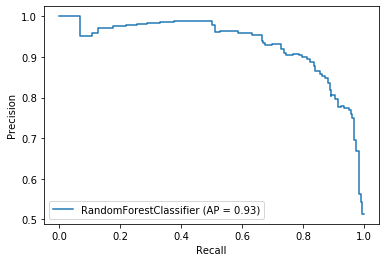

In [237]:
precision, recall, thresholds = precision_recall_curve(y_test, clf_R.predict_proba(X_test)[:,1])
plot_precision_recall_curve(clf_R,X_test,y_test)

In [556]:
import xgboost
clf_X = xgboost.XGBClassifier()


In [557]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.3, random_state = 1)

In [558]:
clf_X.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [559]:
y_pred = clf.predict(X_test)
y_pred = pd.DataFrame(y_pred)
print("Acc score is :",accuracy_score(y_pred,y_test)*100)

Acc score is : 77.80548628428927


In [560]:
print("XGB",classification_report(y_test,y_pred, target_names=None))

XGB               precision    recall  f1-score   support

         0.0       0.84      0.71      0.77       213
         1.0       0.72      0.85      0.78       188

    accuracy                           0.78       401
   macro avg       0.78      0.78      0.78       401
weighted avg       0.79      0.78      0.78       401



In [561]:
y_pred_prob = clf_R.predict_proba(X_test)[:,1]
y_pred_prob = y_pred_prob.reshape(1,-1)

In [562]:
y_pred_class = binarize(y_pred_prob,0.50)[0]
y_pred_class = y_pred_class.astype(int)

In [563]:
print("XGB",classification_report(y_test,y_pred_class, target_names=None))

XGB               precision    recall  f1-score   support

         0.0       0.90      0.85      0.87       213
         1.0       0.84      0.89      0.86       188

    accuracy                           0.87       401
   macro avg       0.87      0.87      0.87       401
weighted avg       0.87      0.87      0.87       401



In [564]:
confusion = confusion_matrix(y_pred_class,y_test)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("\n" ,TP,TN,FP,FN)
mr = ((FP+FN)/(TP+TN+FP+FN))
print("\n mr--",mr)
tpr = TP/(TP+FN)
print("\n tpr--" ,tpr)
fpr = FP/(TN+FP)
print("\n fpr--" ,fpr)
tnr = TN/(TN+FP)
print("\n tnr--" ,tnr)
pre = TP/(FP+TP)
print("\n pre--" ,pre)
preva = (FN+TP)/401
print("\n prev--" ,preva)

[[181  21]
 [ 32 167]]

 167 181 21 32

 mr-- 0.13216957605985039

 tpr-- 0.8391959798994975

 fpr-- 0.10396039603960396

 tnr-- 0.8960396039603961

 pre-- 0.8882978723404256

 prev-- 0.49625935162094764


In [565]:
fpr,tpr,threshold = roc_curve(y_test, clf_X.predict_proba(X_test)[:,1])

In [566]:
XGBoost = roc_auc_score(y_test,y_pred)

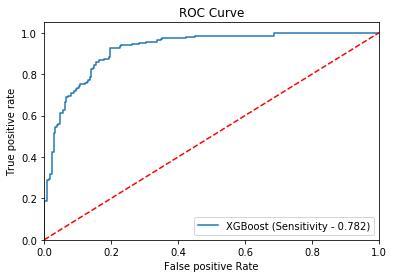

In [567]:
plt.figure()
plt.plot(fpr,tpr,label = 'XGBoost (Sensitivity - %0.3f)'%XGBoost)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

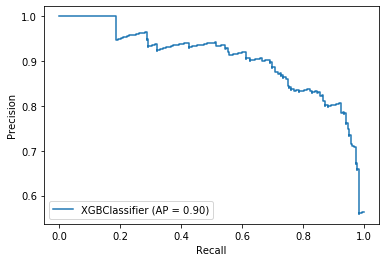

In [568]:
precision, recall, thresholds = precision_recall_curve(y_test, clf_X.predict_proba(X_test)[:,1])
plot_precision_recall_curve(clf_X,X_test,y_test)

In [569]:
from sklearn.naive_bayes import GaussianNB
clf_N = GaussianNB( )

In [570]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res, test_size = 0.3, random_state = 1)

In [571]:
clf_N.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [572]:
y_pred = clf.predict(X_test)
y_pred = pd.DataFrame(y_pred)
print("Acc score is :",accuracy_score(y_pred,y_test)*100)

Acc score is : 77.80548628428927


In [573]:
print("Naive",classification_report(y_test,y_pred, target_names=None))

Naive               precision    recall  f1-score   support

         0.0       0.84      0.71      0.77       213
         1.0       0.72      0.85      0.78       188

    accuracy                           0.78       401
   macro avg       0.78      0.78      0.78       401
weighted avg       0.79      0.78      0.78       401



In [574]:
y_pred_prob = clf_N.predict_proba(X_test)[:,1]
y_pred_prob = y_pred_prob.reshape(1,-1)

In [575]:
y_pred_class = binarize(y_pred_prob,0.40)[0]
y_pred_class = y_pred_class.astype(int)

In [576]:
print("Naive",classification_report(y_test,y_pred_class, target_names=None))

Naive               precision    recall  f1-score   support

         0.0       0.79      0.79      0.79       213
         1.0       0.76      0.76      0.76       188

    accuracy                           0.78       401
   macro avg       0.77      0.77      0.77       401
weighted avg       0.78      0.78      0.78       401



In [577]:
confusion = confusion_matrix(y_pred_class,y_test)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("\n" ,TP,TN,FP,FN)
mr = ((FP+FN)/(TP+TN+FP+FN))
print("\n mr--",mr)
tpr = TP/(TP+FN)
print("\n tpr--" ,tpr)
fpr = FP/(TN+FP)
print("\n fpr--" ,fpr)
tnr = TN/(TN+FP)
print("\n tnr--" ,tnr)
pre = TP/(FP+TP)
print("\n pre--" ,pre)
preva = (FN+TP)/401
print("\n prev--" ,preva)

[[169  46]
 [ 44 142]]

 142 169 46 44

 mr-- 0.22443890274314215

 tpr-- 0.7634408602150538

 fpr-- 0.21395348837209302

 tnr-- 0.786046511627907

 pre-- 0.7553191489361702

 prev-- 0.46384039900249374


In [253]:
fpr,tpr,threshold = roc_curve(y_test, clf_N.predict_proba(X_test)[:,1])

In [254]:
Naive = roc_auc_score(y_test,y_pred)

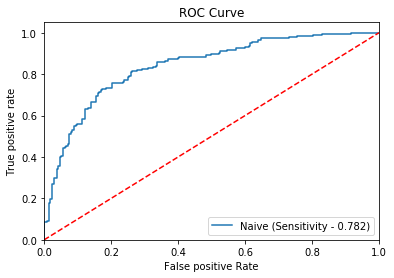

In [255]:
plt.figure()
plt.plot(fpr,tpr,label = 'Naive (Sensitivity - %0.3f)'%Naive)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive Rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.show()

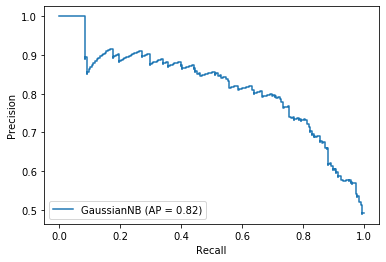

In [580]:
precision, recall, thresholds = precision_recall_curve(y_test, clf_N.predict_proba(X_test)[:,1])
plot_precision_recall_curve(clf_N,X_test,y_test)
